In [228]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [229]:
# Save the filtered dataset to a CSV file
football_data = pd.read_csv('football_data.csv')

In [230]:
football_data.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,original_rating,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
0,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,WhoScored,0,6.56,0,0,0,0,0,0,0,0,0,34,20,5,0,0,5,1,0,2,0,3,11,0,0,8,0,3,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1.071429,0.143055,0.603571,0.304348,0.000000,0.00,0,1,0,90,90
1,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,Sub,Sub,Anthony Martial,WhoScored,0,6.19,0,0,1,0,0,1,1,0,0,10,3,1,0,0,0,0,2,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.428571,0.051556,0.524845,0.041096,0.166667,0.00,1,0,1,13,90
2,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,MF,DMC,Mihai Pintilii,WhoScored,0,6.58,0,0,0,1,0,1,2,0,0,60,31,9,0,0,4,5,5,6,1,1,14,4,1,4,0,7,3,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1.571429,0.333284,0.710084,0.347826,0.675075,0.00,0,1,0,90,90
3,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,FW,FW,Olivier Giroud,WhoScored,0,7.34,1,0,2,2,0,3,0,0,0,47,11,10,1,1,0,0,1,5,11,3,18,1,1,1,0,0,0,0,0,1,1,0,0,1,3,0,0,0,0,0,0,0,1.428571,0.316015,0.754464,0.315068,1.090213,0.05,1,0,1,90,90
4,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DL,Razvan Rat,WhoScored,0,6.38,0,0,0,1,1,0,0,0,0,80,31,15,3,0,13,9,2,3,4,1,21,1,1,1,0,2,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1.500000,0.321679,0.754464,0.478261,0.000000,0.00,0,1,0,90,90


In [231]:
football_data['date'] = pd.to_datetime(football_data['date'], format='%d/%m/%Y')

In [232]:
df_midfielders = football_data[football_data['pos'] == 'MF']

In [233]:
df_midfielders.dtypes

competition                       object
date                      datetime64[ns]
match                             object
team                              object
pos                               object
pos_role                          object
player                            object
rater                             object
is_human                           int64
original_rating                  float64
goals                              int64
assists                            int64
shots_ontarget                     int64
shots_offtarget                    int64
shotsblocked                       int64
chances2score                      int64
drib_success                       int64
drib_unsuccess                     int64
keypasses                          int64
touches                            int64
passes_acc                         int64
passes_inacc                       int64
crosses_acc                        int64
crosses_inacc                      int64
lballs_acc      

In [234]:
# lets move towards splitting the data.

# get the locations
df_midfielders_y = df_midfielders['original_rating']
df_midfielders_X = df_midfielders.drop(columns=['original_rating'], axis=1)

In [235]:
#splitting the X to train,val and test
import pandas as pd
from sklearn.model_selection import train_test_split
player_train_val, player_test, rating_train_val, rating_test = train_test_split(df_midfielders_X, df_midfielders_y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
player_train, player_val, rating_train, rating_val = train_test_split(player_train_val, rating_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(player_train)}")
print(f"Validation set size: {len(player_val)}")
print(f"Test set size: {len(player_test)}")

Training set size: 4323
Validation set size: 1441
Test set size: 1442


In [236]:
#calling out the one for test
player_test.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
9072,Premier League 2017-18,2017-12-09,"West Ham - Chelsea, 1 - 0",Chelsea,MF,MC,N'Golo Kante,WhoScored,0,0,0,1,0,0,1,1,1,1,103,82,4,0,0,4,0,7,9,1,2,8,1,1,0,0,2,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.733333,0.220179,0.871111,0.612245,1.750425,0.000000,0,1,0,90,90
4473,Bundesliga 2017-18,2017-09-30,"Wolfsburg - Mainz 05, 1 - 1",Mainz 05,MF,MC,Fabian Frei,WhoScored,0,0,0,0,1,1,0,0,1,1,33,21,5,0,0,0,1,1,5,1,2,9,1,0,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.133333,0.131751,0.653333,0.207317,1.479905,0.000000,0,0,0,59,90
18777,Premier League 2017-18,2018-05-05,"Stoke - Crystal Palace, 1 - 2",Crystal Palace,MF,MR,James McArthur,WhoScored,0,1,0,1,0,0,0,1,0,0,48,34,5,0,0,3,3,5,4,0,2,7,1,0,0,0,0,3,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1.333333,0.305264,0.687719,0.337662,1.071410,0.055556,1,0,0,90,90
530,Euro 2016,2016-06-17,"Czech Republic - Croatia, 2 - 2",Czech Republic,MF,DMC,Jaroslav Plasil,WhoScored,0,0,0,0,0,0,0,0,0,0,48,29,2,0,1,0,0,4,8,4,2,8,2,2,4,0,2,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.071429,0.148294,0.574830,0.446154,0.000000,0.000000,0,0,0,86,90
694,Euro 2016,2016-06-20,"Slovakia - England, 0 - 0",England,MF,MC,Jordan Henderson,WhoScored,0,0,0,0,2,2,2,0,0,3,99,76,6,2,7,8,3,3,5,0,1,17,1,0,0,0,5,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.928571,0.294582,0.928571,0.586957,2.769412,0.000000,0,0,0,90,90


In [237]:
player_test_clustering=player_test.copy()

In [238]:
player_train_val_clustering=player_train_val.copy()

In [239]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
player_test_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
9072,Premier League 2017-18,2017-12-09,"West Ham - Chelsea, 1 - 0",Chelsea,MF,MC,N'Golo Kante,WhoScored,0,0,0,1,0,0,1,1,1,1,103,82,4,0,0,4,0,7,9,1,2,8,1,1,0,0,2,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.733333,0.220179,0.871111,0.612245,1.750425,0.000000,0,1,0,90,90
4473,Bundesliga 2017-18,2017-09-30,"Wolfsburg - Mainz 05, 1 - 1",Mainz 05,MF,MC,Fabian Frei,WhoScored,0,0,0,0,1,1,0,0,1,1,33,21,5,0,0,0,1,1,5,1,2,9,1,0,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.133333,0.131751,0.653333,0.207317,1.479905,0.000000,0,0,0,59,90
18777,Premier League 2017-18,2018-05-05,"Stoke - Crystal Palace, 1 - 2",Crystal Palace,MF,MR,James McArthur,WhoScored,0,1,0,1,0,0,0,1,0,0,48,34,5,0,0,3,3,5,4,0,2,7,1,0,0,0,0,3,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1.333333,0.305264,0.687719,0.337662,1.071410,0.055556,1,0,0,90,90
530,Euro 2016,2016-06-17,"Czech Republic - Croatia, 2 - 2",Czech Republic,MF,DMC,Jaroslav Plasil,WhoScored,0,0,0,0,0,0,0,0,0,0,48,29,2,0,1,0,0,4,8,4,2,8,2,2,4,0,2,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.071429,0.148294,0.574830,0.446154,0.000000,0.000000,0,0,0,86,90
694,Euro 2016,2016-06-20,"Slovakia - England, 0 - 0",England,MF,MC,Jordan Henderson,WhoScored,0,0,0,0,2,2,2,0,0,3,99,76,6,2,7,8,3,3,5,0,1,17,1,0,0,0,5,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.928571,0.294582,0.928571,0.586957,2.769412,0.000000,0,0,0,90,90


In [186]:
# Save player name and match date in a separate DataFrame
player_match_info = player_test[['player', 'date','competition']].copy()

In [187]:
player_match_info.head()

,player,date,competition
9072,N'Golo Kante,2017-12-09,Premier League 2017-18
4473,Fabian Frei,2017-09-30,Bundesliga 2017-18
18777,James McArthur,2018-05-05,Premier League 2017-18
530,Jaroslav Plasil,2016-06-17,Euro 2016
694,Jordan Henderson,2016-06-20,Euro 2016


## Preprocesing the test set

In [188]:
#drop the single columns
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','player','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_test= player_test.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test.head())

            date pos_role  goals  assists  shots_ontarget  shots_offtarget  \
9072  2017-12-09       MC      0        0               1                0   
4473  2017-09-30       MC      0        0               0                1   
18777 2018-05-05       MR      1        0               1                0   
530   2016-06-17      DMC      0        0               0                0   
694   2016-06-20       MC      0        0               0                2   

       shotsblocked  chances2score  drib_success  drib_unsuccess  keypasses  \
9072              0              1             1               1          1   
4473              1              0             0               1          1   
18777             0              0             1               0          0   
530               0              0             0               0          0   
694               2              2             0               0          3   

       touches  passes_acc  passes_inacc  crosses_acc  c

In [189]:
#preprocessig
player_test['date'] = pd.to_datetime(player_test['date'], errors='coerce')

# Check for any NaT values
if player_test['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_test['year'] = player_test['date'].dt.year
player_test['month'] = player_test['date'].dt.month
player_test['day'] = player_test['date'].dt.day

# Drop the original 'date' column
player_test = player_test.drop(columns=['date'])

# Display the DataFrame
print(player_test.head())

      pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
9072        MC      0        0               1                0             0   
4473        MC      0        0               0                1             1   
18777       MR      1        0               1                0             0   
530        DMC      0        0               0                0             0   
694         MC      0        0               0                2             2   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
9072               1             1               1          1      103   
4473               0             0               1          1       33   
18777              0             1               0          0       48   
530                0             0               0          0       48   
694                2             0               0          3       99   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_

In [190]:
player_test.head()

,pos_role,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,saves_otb,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration,year,month,day
9072,MC,0,0,1,0,0,1,1,1,1,103,82,4,0,0,4,0,7,9,1,2,8,1,1,0,0,2,3,1,2,0,0,0,0,0,0,0,0,0,1.733333,0.220179,0.871111,0.612245,1.750425,0.000000,90,90,2017,12,9
4473,MC,0,0,0,1,1,0,0,1,1,33,21,5,0,0,0,1,1,5,1,2,9,1,0,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,1.133333,0.131751,0.653333,0.207317,1.479905,0.000000,59,90,2017,9,30
18777,MR,1,0,1,0,0,0,1,0,0,48,34,5,0,0,3,3,5,4,0,2,7,1,0,0,0,0,3,0,0,0,0,0,0,6,0,0,0,0,1.333333,0.305264,0.687719,0.337662,1.071410,0.055556,90,90,2018,5,5
530,DMC,0,0,0,0,0,0,0,0,0,48,29,2,0,1,0,0,4,8,4,2,8,2,2,4,0,2,3,1,0,0,0,0,1,0,0,0,0,0,1.071429,0.148294,0.574830,0.446154,0.000000,0.000000,86,90,2016,6,17
694,MC,0,0,0,2,2,2,0,0,3,99,76,6,2,7,8,3,3,5,0,1,17,1,0,0,0,5,1,0,2,0,0,0,0,0,0,0,0,0,1.928571,0.294582,0.928571,0.586957,2.769412,0.000000,90,90,2016,6,20


In [191]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = player_test.select_dtypes(exclude="object").columns
cat_features = player_test.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
player_test = preprocessor.fit_transform(player_test)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
player_test= pd.DataFrame(player_test, columns=all_col_names)
print(player_test.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             0.0              0.0           0.0   
1    0.0      0.0             0.0              0.0           0.0   
2    0.0      0.0             0.0              0.0           0.0   
3    0.0      0.0             0.0              1.0           0.0   
4    0.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0            0.0           1.0             0.0        0.0      0.0   
1            0.0           1.0             0.0        0.0      0.0   
2            0.0           0.0             0.0        1.0      0.5   
3            0.0           0.0             0.0        0.0      0.0   
4            0.0           1.0             0.0        0.0      0.0   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0         0.0          0.25     0.000000           0.00    0.166667   
1         0.0          0.00 

In [192]:
#removing the higly correlted columns
#List of columns to remove
remove_columns = ['aerials_l', 'pos_role_AMC', 'pos_role_AML']

# Remove specified columns from the DataFrame
player_test= player_test.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             0.0              0.0           0.0   
1    0.0      0.0             0.0              0.0           0.0   
2    0.0      0.0             0.0              0.0           0.0   
3    0.0      0.0             0.0              1.0           0.0   
4    0.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0            0.0           1.0             0.0        0.0      0.0   
1            0.0           1.0             0.0        0.0      0.0   
2            0.0           0.0             0.0        1.0      0.5   
3            0.0           0.0             0.0        0.0      0.0   
4            0.0           1.0             0.0        0.0      0.0   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0         0.0          0.25     0.000000           0.00    0.166667   
1         0.0          0.00 

## processes for the train to use for feature importance

In [193]:
#drop the single columns
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','player','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_train= player_train.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train.head())

            date pos_role  goals  assists  shots_ontarget  shots_offtarget  \
11711 2018-01-13       MC      0        0               0                0   
4495  2017-09-30       MC      0        0               0                1   
18520 2018-05-05       MC      0        0               0                0   
11738 2018-01-13      AMC      0        0               0                2   
14675 2018-03-03      AMC      0        0               0                1   

       shotsblocked  chances2score  drib_success  drib_unsuccess  keypasses  \
11711             0              0             0               0          0   
4495              0              1             0               0          0   
18520             0              0             0               0          0   
11738             0              2             2               0          0   
14675             0              1             1               1          0   

       touches  passes_acc  passes_inacc  crosses_acc  c

In [194]:
#preprocessig
player_train['date'] = pd.to_datetime(player_train['date'], errors='coerce')

# Check for any NaT values
if player_train['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_train['year'] = player_train['date'].dt.year
player_train['month'] = player_train['date'].dt.month
player_train['day'] = player_train['date'].dt.day

# Drop the original 'date' column
player_train = player_train.drop(columns=['date'])

# Display the DataFrame
print(player_train.head())

      pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
11711       MC      0        0               0                0             0   
4495        MC      0        0               0                1             0   
18520       MC      0        0               0                0             0   
11738      AMC      0        0               0                2             0   
14675      AMC      0        0               0                1             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
11711              0             0               0          0       66   
4495               1             0               0          0       64   
18520              0             0               0          0       42   
11738              2             2               0          0       44   
14675              1             1               1          0       55   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_

In [195]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = player_train.select_dtypes(exclude="object").columns
cat_features = player_train.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
player_train = preprocessor.fit_transform(player_train)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
player_train= pd.DataFrame(player_train, columns=all_col_names)
print(player_train.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             0.0              0.0           0.0   
1    0.0      0.0             0.0              0.0           0.0   
2    0.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    1.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0            0.0           1.0             0.0        0.0      0.0   
1            0.0           1.0             0.0        0.0      0.0   
2            0.0           1.0             0.0        0.0      0.0   
3            0.0           0.0             0.0        0.0      0.0   
4            0.0           0.0             0.0        0.0      0.0   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0         0.0           0.0     0.000000            0.0    0.000000   
1         0.0           0.0 

In [196]:
#removing the higly correlted columns
#List of columns to remove
remove_columns = ['aerials_l', 'pos_role_AMC', 'pos_role_AML']

# Remove specified columns from the DataFrame
player_train= player_train.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             0.0              0.0           0.0   
1    0.0      0.0             0.0              0.0           0.0   
2    0.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    1.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0            0.0           1.0             0.0        0.0      0.0   
1            0.0           1.0             0.0        0.0      0.0   
2            0.0           1.0             0.0        0.0      0.0   
3            0.0           0.0             0.0        0.0      0.0   
4            0.0           0.0             0.0        0.0      0.0   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0         0.0           0.0     0.000000            0.0    0.000000   
1         0.0           0.0 

## Preprocessing the train_val set

In [197]:
#drop the single columns
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','player','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_train_val= player_train_val.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val.head())

            date pos_role  goals  assists  shots_ontarget  shots_offtarget  \
17874 2018-04-22      DMR      0        0               0                0   
9839  2017-12-16       ML      0        0               0                1   
15440 2018-03-10      AMR      0        0               0                0   
18391 2018-04-29      AML      0        0               1                1   
8949  2017-12-09      DMR      0        0               0                0   

       shotsblocked  chances2score  drib_success  drib_unsuccess  keypasses  \
17874             0              0             0               0          0   
9839              0              1             2               0          0   
15440             0              0             0               0          2   
18391             0              2             1               3          0   
8949              0              0             0               0          0   

       touches  passes_acc  passes_inacc  crosses_acc  c

In [198]:
#preprocessig
player_train_val['date'] = pd.to_datetime(player_train_val['date'], errors='coerce')

# Check for any NaT values
if player_train_val['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_train_val['year'] = player_train_val['date'].dt.year
player_train_val['month'] = player_train_val['date'].dt.month
player_train_val['day'] = player_train_val['date'].dt.day

# Drop the original 'date' column
player_train_val = player_train_val.drop(columns=['date'])

# Display the DataFrame
print(player_train_val.head())

      pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
17874      DMR      0        0               0                0             0   
9839        ML      0        0               0                1             0   
15440      AMR      0        0               0                0             0   
18391      AML      0        0               1                1             0   
8949       DMR      0        0               0                0             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
17874              0             0               0          0       42   
9839               1             2               0          0       36   
15440              0             0               0          2       67   
18391              2             1               3          0       29   
8949               0             0               0          0       34   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_

In [199]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = player_train_val.select_dtypes(exclude="object").columns
cat_features = player_train_val.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
player_train_val = preprocessor.fit_transform(player_train_val)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
player_train_val= pd.DataFrame(player_train_val, columns=all_col_names)
print(player_train_val.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             0.0              0.0           0.0   
1    0.0      0.0             0.0              0.0           0.0   
2    0.0      0.0             1.0              0.0           0.0   
3    0.0      1.0             0.0              0.0           0.0   
4    0.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0            1.0           0.0             0.0        0.0      0.0   
1            0.0           0.0             1.0        0.0      0.0   
2            0.0           0.0             0.0        0.0      0.0   
3            0.0           0.0             0.0        0.0      0.0   
4            1.0           0.0             0.0        0.0      0.0   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0         0.0           0.0     0.000000            0.0    0.000000   
1         0.0           0.0 

In [200]:
#removing the higly correlted columns
#List of columns to remove
remove_columns = ['aerials_l', 'pos_role_AMC', 'pos_role_AML']

# Remove specified columns from the DataFrame
player_train_val= player_train_val.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             0.0              0.0           0.0   
1    0.0      0.0             0.0              0.0           0.0   
2    0.0      0.0             1.0              0.0           0.0   
3    0.0      1.0             0.0              0.0           0.0   
4    0.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0            1.0           0.0             0.0        0.0      0.0   
1            0.0           0.0             1.0        0.0      0.0   
2            0.0           0.0             0.0        0.0      0.0   
3            0.0           0.0             0.0        0.0      0.0   
4            1.0           0.0             0.0        0.0      0.0   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0         0.0           0.0     0.000000            0.0    0.000000   
1         0.0           0.0 

In [ ]:
#the features to use for model
touches
aerials_w
pos_role_DMC
passes_acc
interceptions
passes_inacc
pos_role_AMR
lballs_inacc
dribbled_past
saves_otb
dangmistakes
grduels_l
offsides
pos_role_DML
flow_success
flow_centrality
month
betweenness_centrality
countattack
day
tballs_inacc
wasfouled
clearances
tballs_acc
closeness_centrality
tackles
rcards
owngoals
pos_role_MR
poss_lost  

In [40]:
import joblib

In [201]:
selected_features =['touches',
'aerials_w',
'pos_role_DMC',
'passes_acc',
'interceptions',
'passes_inacc',
'pos_role_AMR',
'lballs_inacc',
'dribbled_past',
'saves_otb',
'dangmistakes',
'grduels_l',
'offsides',
'pos_role_DML',
'flow_success',
'flow_centrality',
'month',
'betweenness_centrality',
'countattack',
'day',
'tballs_inacc',
'wasfouled',
'clearances',
'tballs_acc',
'closeness_centrality',
'tackles',
'rcards',
'owngoals',
'pos_role_MR',
'poss_lost'] 
player_test_subset = player_test[selected_features]

In [202]:
player_test_subset.head()

,touches,aerials_w,pos_role_DMC,passes_acc,interceptions,passes_inacc,pos_role_AMR,lballs_inacc,dribbled_past,saves_otb,dangmistakes,grduels_l,offsides,pos_role_DML,flow_success,flow_centrality,month,betweenness_centrality,countattack,day,tballs_inacc,wasfouled,clearances,tballs_acc,closeness_centrality,tackles,rcards,owngoals,pos_role_MR,poss_lost
0,0.0,0.607362,0.000000,0.0,0.291667,0.25,0.425806,0.111111,0.076923,0.3,0.000,0.2,0.153846,0.716981,0.0,0.000000,0.882521,0.0,0.0,0.443226,0.258065,0.0,0.285714,0.181818,0.0,0.600000,0.125,0.4,0.266667,0.173913
1,0.0,0.177914,0.000000,0.0,0.041667,0.00,0.360000,0.000000,0.076923,0.1,0.125,0.2,0.153846,0.424528,0.0,0.000000,0.521490,0.0,0.0,0.265218,0.290323,0.0,0.000000,0.181818,0.0,0.333333,0.000,0.0,0.966667,0.217391
2,0.5,0.269939,0.388889,0.0,0.208333,0.25,0.260630,0.111111,0.000000,0.3,0.000,0.0,0.000000,0.716981,0.5,0.000000,0.641834,0.0,0.0,0.614504,0.225806,0.0,0.214286,0.181818,0.0,0.266667,0.000,0.0,0.133333,0.217391
3,0.0,0.269939,0.000000,0.0,0.166667,0.00,0.000000,0.000000,0.307692,0.3,0.500,0.0,0.153846,0.679245,0.0,0.333333,0.484241,0.0,0.0,0.298520,0.258065,0.1,0.000000,0.181818,0.0,0.533333,0.250,0.0,0.533333,0.086957
4,0.0,0.582822,0.000000,0.0,0.125000,0.00,0.673684,0.000000,0.000000,0.1,0.000,0.6,0.384615,0.716981,0.0,0.000000,1.000000,0.0,0.0,0.593000,0.548387,0.7,0.571429,0.090909,0.0,0.333333,0.000,0.4,0.633333,0.260870


In [205]:
import joblib
midfielders_model = joblib.load("xgboost_model.pkl")

In [206]:
import pandas as pd


# Make predictions on the test data
xgb_predictions = midfielders_model.predict(player_test_subset)

# Round the predictions to one decimal place
xgb_predictions_rounded = [round(pred, 1) for pred in xgb_predictions]

# Create a DataFrame with the rounded predictions
predictions_df = pd.DataFrame(xgb_predictions_rounded, columns=['Predicted_Ratings'])


print(predictions_df)

      Predicted_Ratings
0                   7.5
1                   6.5
2                   8.0
3                   7.5
4                   7.7
5                   7.4
6                   7.6
7                   6.6
8                   6.2
9                   7.1
10                  6.6
11                  7.0
12                  6.4
13                  7.5
14                  6.1
15                  6.4
16                  6.5
17                  8.5
18                  7.3
19                  6.7
20                  7.3
21                  6.9
22                  7.8
23                  6.3
24                  6.4
25                  7.0
26                  7.2
27                  6.4
28                  6.5
29                  6.6
30                  6.6
31                  7.0
32                  7.0
33                  6.7
34                  7.0
35                  7.4
36                  7.2
37                  7.1
38                  7.2
39                  6.5
40              

In [207]:
# Concatenate the DataFrames along the columns
# Make sure all DataFrames have the same number of rows
combined_test_df = pd.concat([player_match_info.reset_index(drop=True), 
                         predictions_df.reset_index(drop=True), 
                         rating_test.reset_index(drop=True)], axis=1)

print(combined_test_df)

                        player       date             competition  \
0                 N'Golo Kante 2017-12-09  Premier League 2017-18   
1                  Fabian Frei 2017-09-30      Bundesliga 2017-18   
2               James McArthur 2018-05-05  Premier League 2017-18   
3              Jaroslav Plasil 2016-06-17               Euro 2016   
4             Jordan Henderson 2016-06-20               Euro 2016   
5                   Paul Pogba 2017-11-25  Premier League 2017-18   
6                Jonathan Hogg 2018-05-09  Premier League 2017-18   
7                 Ashley Young 2018-06-24          World Cup 2018   
8                Ki Sung-Yueng 2017-11-25  Premier League 2017-18   
9                 Arjen Robben 2017-08-26      Bundesliga 2017-18   
10               Marcos Alonso 2018-01-20  Premier League 2017-18   
11             Matthias Ginter 2017-11-04      Bundesliga 2017-18   
12                Steven Davis 2017-12-23  Premier League 2017-18   
13               Dries Mertens 201

In [208]:
combined_test_df.head()

,player,date,competition,Predicted_Ratings,original_rating
0,N'Golo Kante,2017-12-09,Premier League 2017-18,7.5,7.39
1,Fabian Frei,2017-09-30,Bundesliga 2017-18,6.5,6.58
2,James McArthur,2018-05-05,Premier League 2017-18,8.0,7.54
3,Jaroslav Plasil,2016-06-17,Euro 2016,7.5,6.42
4,Jordan Henderson,2016-06-20,Euro 2016,7.7,7.33


In [209]:
# Calculate total predicted ratings and number of matches played for each player
player_stats = combined_test_df.groupby(['player']).agg({
    'Predicted_Ratings': ['sum', 'count']
}).reset_index()

# Rename columns
player_stats.columns = ['player', 'total_predicted_rating', 'matches_played']

# Calculate weighted average predicted ratings
player_stats['weighted_avg_predicted_rating'] = player_stats['total_predicted_rating'] / player_stats['matches_played']

# Rank players based on weighted average predicted ratings
player_stats['weighted_avg_predicted_rank'] = player_stats['weighted_avg_predicted_rating'].rank(ascending=False)

# Sort by rank in ascending order
player_stats_sorted = player_stats.sort_values(by='weighted_avg_predicted_rank')

In [210]:
# Display the DataFrame
print(player_stats_sorted.head(20))

                player  total_predicted_rating  matches_played  \
326      Mathew Leckie                9.300000               1   
50   Antoine Griezmann                9.000000               1   
13     Ademola Lookman                9.000000               1   
402  Philippe Coutinho                8.400000               1   
115      Daryl Janmaat                8.300000               1   
28      Alexis Sanchez               16.299999               2   
462        Tatsuya Ito                8.100000               1   
24          Alex Iwobi               16.200001               2   
167    Gerard Deulofeu                8.100000               1   
376         Nuri Sahin               16.100000               2   
124    Denis Cheryshev                8.000000               1   
510     Yussuf Poulsen                8.000000               1   
459       Takashi Inui                8.000000               1   
260    Kevin De Bruyne               48.000000               6   
137       

In [211]:
# Display the DataFrame
print(player_stats_sorted.tail(20))

               player  total_predicted_rating  matches_played  \
509      Yuri Zhirkov                     6.2               1   
74    Blerim Dzemaili                    12.4               2   
306  Marcel Tisserand                     6.2               1   
389      Patrice Evra                     6.2               1   
433        Sam Clucas                    12.4               2   
489    Vladimir Weiss                     6.2               1   
46          Andy King                     6.2               1   
434         Sam Field                     6.2               1   
259    Kerem Demirbay                     6.2               1   
330    Matteo Darmian                     6.2               1   
451    Sofiane Boufal                     6.2               1   
368       Nathan Dyer                    30.9               5   
405   Piotr Zielinski                     6.1               1   
289    Levin Oztunali                     6.1               1   
185   Ibrahim Afellay    

In [212]:
# Calculate total original ratings and number of matches played for each player
player_stats = combined_test_df.groupby(['player']).agg({
    'original_rating': ['sum', 'count']
}).reset_index()

# Rename columns
player_stats.columns = ['player', 'total_original_rating', 'matches_played']

# Calculate weighted average predicted ratings
player_stats['weighted_avg_original_rating'] = player_stats['total_original_rating'] / player_stats['matches_played']

# Rank players based on weighted average predicted ratings
player_stats['weighted_avg_original_rank'] = player_stats['weighted_avg_original_rating'].rank(ascending=False)

# Sort by rank in ascending order
player_stats_sorted = player_stats.sort_values(by='weighted_avg_original_rank')

In [213]:
# Display the DataFrame
print(player_stats_sorted.head(20))

                 player  total_original_rating  matches_played  \
50    Antoine Griezmann                   9.75               1   
326       Mathew Leckie                   9.47               1   
402   Philippe Coutinho                   8.88               1   
167     Gerard Deulofeu                   8.81               1   
13      Ademola Lookman                   8.69               1   
341  Maximilian Philipp                   8.59               1   
28       Alexis Sanchez                  16.76               2   
260     Kevin De Bruyne                  49.93               6   
55         Arturo Vidal                  41.30               5   
320   Marouane Fellaini                   8.18               1   
513         Zoltan Gera                   8.18               1   
459        Takashi Inui                   8.13               1   
376          Nuri Sahin                  16.17               2   
410   Raphael Guerreiro                   8.08               1   
115       

In [214]:
# Display the DataFrame
print(player_stats_sorted.tail(20))

                  player  total_original_rating  matches_played  \
20     Aleksandr Kokorin                   6.04               1   
368          Nathan Dyer                  30.12               5   
356       Mohamed Elneny                  12.04               2   
154        Ferjani Sassi                   5.99               1   
238  Jose Luis Rodriguez                   5.99               1   
378      Oguzhan Ozyakup                   5.98               1   
384           Ozan Tufan                   5.96               1   
3           Aaron Lennon                   5.95               1   
194          Iver Fossum                  11.89               2   
227         Jonas Hector                   5.94               1   
250      Julian Schuster                   5.94               1   
191         Isaiah Brown                   5.92               1   
423           Roque Mesa                   5.88               1   
120        Davy Klaassen                   5.80               

# using clustering method for the ranking

# using all features with average performances

In [240]:
player_train_val_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
17874,Premier League 2017-18,2018-04-22,"Arsenal - West Ham, 4 - 1",West Ham,MF,DMR,Pablo Zabaleta,WhoScored,0,0,0,0,0,0,0,0,0,0,42,14,6,0,2,2,0,3,9,0,1,10,2,1,1,1,3,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.866667,0.164992,0.593939,0.307692,1.008977,0.0,0,1,0,90,90
9839,Bundesliga 2017-18,2017-12-16,"FC Koln - Wolfsburg, 1 - 0",FC Koln,MF,ML,Chris Fuhrich,WhoScored,0,0,0,0,1,0,1,2,0,0,36,21,5,0,0,0,0,6,5,1,1,6,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.116009,0.622222,0.283784,0.727964,0.0,1,0,1,71,90
15440,Premier League 2017-18,2018-03-10,"Newcastle United - Southampton, 3 - 0",Southampton,MF,AMR,James Ward-Prowse,WhoScored,0,0,0,0,0,0,0,0,0,2,67,42,9,1,4,1,3,4,1,0,2,16,1,2,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.333333,0.186491,0.653333,0.364583,0.674535,0.0,0,1,0,90,90
18391,Premier League 2017-18,2018-04-29,"Manchester United - Arsenal, 2 - 1",Arsenal,MF,AML,Reiss Nelson,WhoScored,0,0,0,1,1,0,2,1,3,0,29,20,0,0,1,0,0,1,8,0,0,10,0,1,0,0,4,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1.000000,0.089531,0.622222,0.283582,1.692251,0.0,0,1,0,64,90
8949,Premier League 2017-18,2017-12-09,"West Ham - Chelsea, 1 - 0",West Ham,MF,DMR,Pablo Zabaleta,WhoScored,0,0,0,0,0,0,0,0,0,0,34,10,10,0,0,1,6,3,7,1,0,16,2,0,1,1,5,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.857143,0.142926,0.571429,0.240741,0.682543,0.0,1,0,1,90,90


In [241]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_train_val_clustering= player_train_val_clustering.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val_clustering.head())

            date pos_role             player  goals  assists  shots_ontarget  \
17874 2018-04-22      DMR     Pablo Zabaleta      0        0               0   
9839  2017-12-16       ML      Chris Fuhrich      0        0               0   
15440 2018-03-10      AMR  James Ward-Prowse      0        0               0   
18391 2018-04-29      AML       Reiss Nelson      0        0               1   
8949  2017-12-09      DMR     Pablo Zabaleta      0        0               0   

       shots_offtarget  shotsblocked  chances2score  drib_success  \
17874                0             0              0             0   
9839                 1             0              1             2   
15440                0             0              0             0   
18391                1             0              2             1   
8949                 0             0              0             0   

       drib_unsuccess  keypasses  touches  passes_acc  passes_inacc  \
17874               0          0 

In [242]:
player_train_val_clustering.head()

,date,pos_role,player,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,saves_otb,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration
17874,2018-04-22,DMR,Pablo Zabaleta,0,0,0,0,0,0,0,0,0,42,14,6,0,2,2,0,3,9,0,1,10,2,1,1,1,3,2,1,1,0,1,0,0,0,0,0,0,0,0.866667,0.164992,0.593939,0.307692,1.008977,0.0,90,90
9839,2017-12-16,ML,Chris Fuhrich,0,0,0,1,0,1,2,0,0,36,21,5,0,0,0,0,6,5,1,1,6,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1.000000,0.116009,0.622222,0.283784,0.727964,0.0,71,90
15440,2018-03-10,AMR,James Ward-Prowse,0,0,0,0,0,0,0,0,2,67,42,9,1,4,1,3,4,1,0,2,16,1,2,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1.333333,0.186491,0.653333,0.364583,0.674535,0.0,90,90
18391,2018-04-29,AML,Reiss Nelson,0,0,1,1,0,2,1,3,0,29,20,0,0,1,0,0,1,8,0,0,10,0,1,0,0,4,0,1,0,0,0,0,0,6,0,0,0,0,1.000000,0.089531,0.622222,0.283582,1.692251,0.0,64,90
8949,2017-12-09,DMR,Pablo Zabaleta,0,0,0,0,0,0,0,0,0,34,10,10,0,0,1,6,3,7,1,0,16,2,0,1,1,5,3,0,0,0,0,0,0,1,0,0,0,0,0.857143,0.142926,0.571429,0.240741,0.682543,0.0,90,90


In [243]:
# Select columns relevant to player performance metrics, excluding 'date' and 'player'
metric_columns = player_train_val_clustering.columns.difference(['date', 'player','pos_role'])

# Identify network metrics columns
network_metrics_columns = [
    'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals','flow_success']

# Identify performance metric columns (excluding network metrics)
performance_metric_columns = metric_columns.difference(network_metrics_columns)

# Display the selected columns
print("Performance metric columns:")
print(performance_metric_columns)
print("Network metric columns:")
print(network_metrics_columns)

Performance metric columns:
Index(['aerials_l', 'aerials_w', 'assists', 'chances2score', 'clearances',
       'countattack', 'crosses_acc', 'crosses_inacc', 'dangmistakes',
       'drib_success', 'drib_unsuccess', 'dribbled_past', 'fouls',
       'game_duration', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'keypasses', 'lballs_acc', 'lballs_inacc', 'minutesPlayed',
       'missed_penalties', 'offsides', 'owngoals', 'passes_acc',
       'passes_inacc', 'poss_lost', 'rcards', 'saves_otb', 'shots_offtarget',
       'shots_ontarget', 'shotsblocked', 'stop_shots', 'tackles', 'tballs_acc',
       'tballs_inacc', 'touches', 'wasfouled', 'ycards'],
      dtype='object')
Network metric columns:
['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals', 'flow_success']


In [244]:
import pandas as pd

# Assuming player_train_val_clustering is the DataFrame with your data

# Aggregate performance metrics for each player by summing up the values
aggregated_df = player_train_val_clustering.groupby('player')[performance_metric_columns].sum().reset_index()

# Aggregate network metrics for each player by averaging the values
network_aggregated_df = player_train_val_clustering.groupby('player')[network_metrics_columns].mean().reset_index()

# Get the first 'pos' role for each player
pos_role_df = player_train_val_clustering.groupby('player')['pos_role'].first().reset_index()

# Merge aggregated performance metrics, network metrics, and pos role
aggregated_df = pd.merge(aggregated_df, network_aggregated_df, on='player')
aggregated_df = pd.merge(aggregated_df, pos_role_df, on='player')

# Calculate the number of matches played by each player
aggregated_df['matches_played'] = player_train_val_clustering.groupby('player')['date'].count().values

print("Aggregated performance, network metrics, and pos role for each player:")
print(aggregated_df.head())

Aggregated performance, network metrics, and pos role for each player:
            player  aerials_l  aerials_w  assists  chances2score  clearances  \
0  Aaron Cresswell          5         12        0              2           6   
1       Aaron Hunt         18         14        1             10          13   
2     Aaron Lennon         14         13        2              7           8   
3       Aaron Mooy         29         27        2             14          39   
4     Aaron Ramsey         17          7        8             23           7   

   countattack  crosses_acc  crosses_inacc  dangmistakes  drib_success  \
0            0           11             29             0             1   
1            9           20             40             3             8   
2           11           10             18             1            10   
3           20           47             74             2            11   
4           27           13             18             6            20   

   

In [245]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
aggregated_df.head()

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_otb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played
0,Aaron Cresswell,5,12,0,2,6,0,11,29,0,1,3,2,2,540,1,28,10,13,4,13,17,540,0,2,0,162,35,94,0,0,1,1,1,2,4,0,5,345,2,1,1.198810,0.211907,0.712308,0.417054,0.004274,0.788353,DML,6
1,Aaron Hunt,18,14,1,10,13,9,20,40,3,8,6,13,21,1620,1,61,59,35,13,54,40,1377,0,2,0,489,120,208,0,0,4,1,1,2,11,5,9,849,26,1,1.198698,0.209668,0.690848,0.331343,0.003741,0.606437,AMC,18
2,Aaron Lennon,14,13,2,7,8,11,10,18,1,10,8,19,18,1710,0,86,61,38,2,7,9,1502,0,1,0,269,81,168,0,0,7,4,4,4,13,2,2,566,13,2,0.925429,0.125567,0.627301,0.231246,0.011988,0.821248,MR,19
3,Aaron Mooy,29,27,2,14,39,20,47,74,2,11,11,17,25,2700,3,117,101,83,18,116,101,2606,0,2,0,1317,272,458,0,0,19,4,13,3,41,9,11,2027,10,3,1.420794,0.261962,0.752872,0.461551,0.004755,0.827001,DMC,30
4,Aaron Ramsey,17,7,8,23,7,27,13,18,6,20,10,8,25,1710,5,97,91,34,11,39,43,1655,0,0,0,958,143,241,0,0,27,17,14,3,19,10,31,1369,30,1,1.501880,0.190584,0.757472,0.476793,0.025702,1.492982,MC,19


In [246]:
# Assuming 'pos_encoded' is the column name for the encoded pos role
# Exclude 'pos_encoded' from the averaging process but still include it in clustering
performance_metric_columns_for_averaging = [col for col in performance_metric_columns if col != 'pos_role']

# Calculate the average performance metrics for each player, excluding 'pos_encoded'
for column in performance_metric_columns_for_averaging:
    aggregated_df[f'average_{column}'] = aggregated_df[column] / aggregated_df['matches_played']

# Select only the average metrics for clustering, plus 'pos_encoded'
average_performance_columns = [f'average_{column}' for column in performance_metric_columns_for_averaging]

# Combine average performance metrics, network metrics, and 'pos_encoded' for clustering
clustering_features = average_performance_columns + network_metrics_columns + ['pos_role']

print("Aggregated DataFrame with average performance metrics, network metrics, and pos role:")
print(aggregated_df[['player'] + clustering_features])


Aggregated DataFrame with average performance metrics, network metrics, and pos role:
                       player  average_aerials_l  average_aerials_w  \
0             Aaron Cresswell           0.833333           2.000000   
1                  Aaron Hunt           1.000000           0.777778   
2                Aaron Lennon           0.736842           0.684211   
3                  Aaron Mooy           0.966667           0.900000   
4                Aaron Ramsey           0.894737           0.368421   
5            Abdallah El Said           3.500000           1.000000   
6           Abdelhamid Sabiri           5.000000           4.000000   
7          Abdoulaye Doucoure           1.433333           1.366667   
8              Abdullah Otayf           0.500000           0.000000   
9                Abel Aguilar           1.000000           1.000000   
10                  Adam Nagy           1.000000           1.000000   
11                Adam Pinter           4.000000           1.0

In [247]:
# Select features for clustering
features = aggregated_df[clustering_features]

In [248]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_otb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role
0,0.833333,2.000000,0.000000,0.333333,1.000000,0.000000,1.833333,4.833333,0.000000,0.166667,0.500000,0.333333,0.333333,90.0,0.166667,4.666667,1.666667,2.166667,0.666667,2.166667,2.833333,90.000000,0.0,0.333333,0.0,27.000000,5.833333,15.666667,0.0,0.0,0.166667,0.166667,0.166667,0.333333,0.666667,0.000000,0.833333,57.500000,0.333333,0.166667,1.198810,0.211907,0.712308,0.417054,0.004274,0.788353,DML
1,1.000000,0.777778,0.055556,0.555556,0.722222,0.500000,1.111111,2.222222,0.166667,0.444444,0.333333,0.722222,1.166667,90.0,0.055556,3.388889,3.277778,1.944444,0.722222,3.000000,2.222222,76.500000,0.0,0.111111,0.0,27.166667,6.666667,11.555556,0.0,0.0,0.222222,0.055556,0.055556,0.111111,0.611111,0.277778,0.500000,47.166667,1.444444,0.055556,1.198698,0.209668,0.690848,0.331343,0.003741,0.606437,AMC
2,0.736842,0.684211,0.105263,0.368421,0.421053,0.578947,0.526316,0.947368,0.052632,0.526316,0.421053,1.000000,0.947368,90.0,0.000000,4.526316,3.210526,2.000000,0.105263,0.368421,0.473684,79.052632,0.0,0.052632,0.0,14.157895,4.263158,8.842105,0.0,0.0,0.368421,0.210526,0.210526,0.210526,0.684211,0.105263,0.105263,29.789474,0.684211,0.105263,0.925429,0.125567,0.627301,0.231246,0.011988,0.821248,MR
3,0.966667,0.900000,0.066667,0.466667,1.300000,0.666667,1.566667,2.466667,0.066667,0.366667,0.366667,0.566667,0.833333,90.0,0.100000,3.900000,3.366667,2.766667,0.600000,3.866667,3.366667,86.866667,0.0,0.066667,0.0,43.900000,9.066667,15.266667,0.0,0.0,0.633333,0.133333,0.433333,0.100000,1.366667,0.300000,0.366667,67.566667,0.333333,0.100000,1.420794,0.261962,0.752872,0.461551,0.004755,0.827001,DMC
4,0.894737,0.368421,0.421053,1.210526,0.368421,1.421053,0.684211,0.947368,0.315789,1.052632,0.526316,0.421053,1.315789,90.0,0.263158,5.105263,4.789474,1.789474,0.578947,2.052632,2.263158,87.105263,0.0,0.000000,0.0,50.421053,7.526316,12.684211,0.0,0.0,1.421053,0.894737,0.736842,0.157895,1.000000,0.526316,1.631579,72.052632,1.578947,0.052632,1.501880,0.190584,0.757472,0.476793,0.025702,1.492982,MC


In [249]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-hot encode 'pos_role'
one_hot_encoder = OneHotEncoder(sparse_output=False)
pos_role_encoded = one_hot_encoder.fit_transform(features[['pos_role']])

# Create a DataFrame with the encoded 'pos_role'
pos_role_encoded_df = pd.DataFrame(pos_role_encoded, columns=one_hot_encoder.get_feature_names_out(['pos_role']))

# Drop the original 'pos_role' column from the features DataFrame
features_without_pos_role = features.drop(columns=['pos_role'])

# Apply Min-Max scaling to the remaining features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_without_pos_role)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_without_pos_role.columns)

# Combine the scaled features with the one-hot encoded 'pos_role'
features_scaled = pd.concat([scaled_features_df, pos_role_encoded_df], axis=1)

# Show the final DataFrame with scaled features and one-hot encoded 'pos_role'
print("Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':")
print(features_scaled.head())


Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':
   average_aerials_l  average_aerials_w  average_assists  \
0           0.079365           0.222222         0.000000   
1           0.095238           0.086420         0.055556   
2           0.070175           0.076023         0.105263   
3           0.092063           0.100000         0.066667   
4           0.085213           0.040936         0.421053   

   average_chances2score  average_clearances  average_countattack  \
0               0.083333            0.166667             0.000000   
1               0.138889            0.120370             0.050000   
2               0.092105            0.070175             0.057895   
3               0.116667            0.216667             0.066667   
4               0.302632            0.061404             0.142105   

   average_crosses_acc  average_crosses_inacc  average_dangmistakes  \
0             0.366667               0.690476              0.000000   
1    

In [250]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components as needed
X_pca = pca.fit_transform(features_scaled)

print("\nPCA-transformed DataFrame:")
print(X_pca)


PCA-transformed DataFrame:
[[-0.22113854  0.24991244]
 [-0.44931092 -0.1753606 ]
 [-0.44507377 -0.16769232]
 ...
 [-0.57093004 -0.42996108]
 [ 0.69074551 -0.26740193]
 [-0.17838861  0.69595289]]


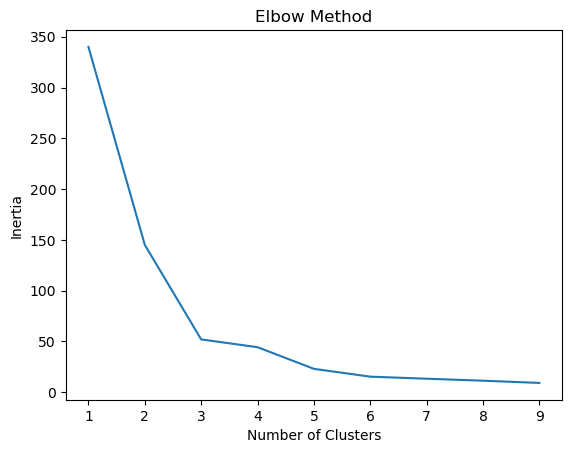

In [251]:
#uisng the elbow method to find the best k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fitting KMeans models starting from k=1 to k=10
kmeans_models = [KMeans(n_clusters=k).fit(X_pca) for k in range(1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

# Plotting the inertia values as a function of k
plt.plot(range(1, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [252]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'encoded_cluster_df' is your DataFrame containing the data

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over the range of k values from 3 to 7
for k in range(2, 10):  # Note that the upper limit in range() is exclusive, so use 8 to include 7
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)
    
    # Print the silhouette score for the current k
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.6210
Silhouette Score for k=3: 0.6854
Silhouette Score for k=4: 0.6196
Silhouette Score for k=5: 0.6074
Silhouette Score for k=6: 0.5442
Silhouette Score for k=7: 0.5224
Silhouette Score for k=8: 0.5316
Silhouette Score for k=9: 0.4760


In [253]:
from sklearn.cluster import KMeans

# Assuming 'encoded_cluster_df' is your DataFrame containing the data
k_values = [2, 3, 8]
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)  # Fitting the model to find centroids
    labels = kmeans.predict(X_pca)  # Predicting the cluster labels based on the fitted model
    cluster_labels[k] = labels

# Print labels for one of the k values
print("Labels for k=2:", cluster_labels[3])

Labels for k=2: [1 1 1 2 0 1 1 2 2 1 2 2 1 1 1 1 1 1 0 1 1 1 2 2 1 1 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 1 2 1 1 1 0 1 1 1 0 2 0 2 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1
 1 0 0 1 0 0 1 0 1 1 1 1 1 2 1 2 2 0 1 1 2 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1 2
 1 0 1 0 1 0 2 0 2 0 1 0 0 1 1 2 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 2 0 1 1
 2 1 0 0 0 0 2 1 2 1 1 0 1 2 0 1 2 0 1 1 2 1 0 2 1 1 0 0 0 0 1 0 0 1 2 0 1
 1 2 0 2 1 0 2 1 1 1 1 0 2 1 1 2 1 1 1 1 1 2 0 1 0 1 1 0 1 2 1 1 1 1 1 2 2
 0 1 0 2 1 2 1 1 1 1 1 0 0 1 1 2 2 1 1 1 1 2 1 1 2 1 2 1 2 0 1 0 1 0 1 1 1
 0 0 2 1 1 0 0 2 0 0 1 0 0 1 1 0 0 2 1 1 2 0 1 1 0 0 0 1 1 0 0 1 0 0 1 2 1
 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 2 1 0 1 1 1 1 1 2 0 0 1 0 0 2 1 0 1 2 1 2 1
 1 1 1 1 1 1 1 1 0 0 0 1 2 1 1 0 0 1 0 1 2 2 2 1 0 1 2 1 1 1 0 1 2 1 1 2 1
 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 0 0 1 0 1 0 0 1 2 1 0 1 0 2 1
 1 0 2 1 1 1 1 0 1 2 0 0 1 1 0 1 1 0 1 0 0 1 2 1 1 2 1 1 1 1 0 2 1 1 0 1 1
 0 2 1 1 0 1 2 1 0 1 1 1 2 1 1 2 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 2 1 1 1 2
 1 0 1 1 

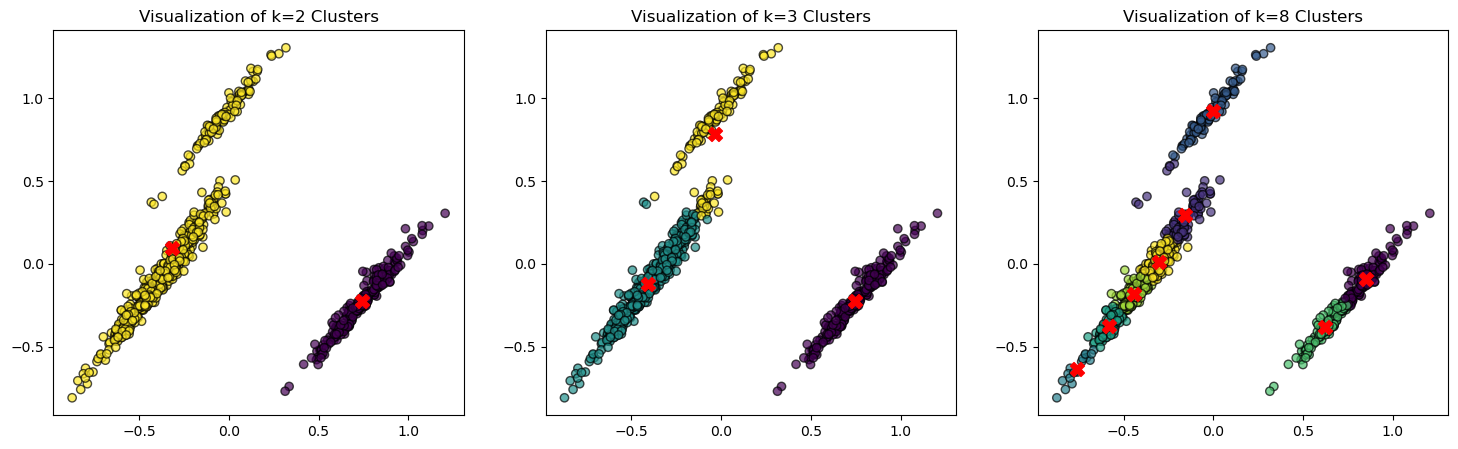

In [254]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X_pca' is your precomputed PCA data ready for clustering and visualization

# Selected k values to visualize
k_values = [2,3,8]

# Set up the plot
fig, axes = plt.subplots(1, len(k_values), figsize=(18, 5))  # Create a subplot for each selected k

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)  # Fitting the model to the PCA reduced data
    labels = kmeans.predict(X_pca)  # Predicting cluster labels on the same data

    # Scatter plot of the reduced data with color by cluster label
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Visualization of k={k} Clusters')
    # Optionally, plot centroids
    centroids = kmeans.cluster_centers_
    axes[i].scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X')  # Plot centroids

plt.show()

In [255]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

In [256]:
# Add the cluster labels to the DataFrame
aggregated_df['cluster'] = labels

In [257]:
aggregated_df.head()

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_otb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_otb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster
0,Aaron Cresswell,5,12,0,2,6,0,11,29,0,1,3,2,2,540,1,28,10,13,4,13,17,540,0,2,0,162,35,94,0,0,1,1,1,2,4,0,5,345,2,1,1.198810,0.211907,0.712308,0.417054,0.004274,0.788353,DML,6,0.833333,2.000000,0.000000,0.333333,1.000000,0.000000,1.833333,4.833333,0.000000,0.166667,0.500000,0.333333,0.333333,90.0,0.166667,4.666667,1.666667,2.166667,0.666667,2.166667,2.833333,90.000000,0.0,0.333333,0.0,27.000000,5.833333,15.666667,0.0,0.0,0.166667,0.166667,0.166667,0.333333,0.666667,0.000000,0.833333,57.500000,0.333333,0.166667,1
1,Aaron Hunt,18,14,1,10,13,9,20,40,3,8,6,13,21,1620,1,61,59,35,13,54,40,1377,0,2,0,489,120,208,0,0,4,1,1,2,11,5,9,849,26,1,1.198698,0.209668,0.690848,0.331343,0.003741,0.606437,AMC,18,1.000000,0.777778,0.055556,0.555556,0.722222,0.500000,1.111111,2.222222,0.166667,0.444444,0.333333,0.722222,1.166667,90.0,0.055556,3.388889,3.277778,1.944444,0.722222,3.000000,2.222222,76.500000,0.0,0.111111,0.0,27.166667,6.666667,11.555556,0.0,0.0,0.222222,0.055556,0.055556,0.111111,0.611111,0.277778,0.500000,47.166667,1.444444,0.055556,1
2,Aaron Lennon,14,13,2,7,8,11,10,18,1,10,8,19,18,1710,0,86,61,38,2,7,9,1502,0,1,0,269,81,168,0,0,7,4,4,4,13,2,2,566,13,2,0.925429,0.125567,0.627301,0.231246,0.011988,0.821248,MR,19,0.736842,0.684211,0.105263,0.368421,0.421053,0.578947,0.526316,0.947368,0.052632,0.526316,0.421053,1.000000,0.947368,90.0,0.000000,4.526316,3.210526,2.000000,0.105263,0.368421,0.473684,79.052632,0.0,0.052632,0.0,14.157895,4.263158,8.842105,0.0,0.0,0.368421,0.210526,0.210526,0.210526,0.684211,0.105263,0.105263,29.789474,0.684211,0.105263,1
3,Aaron Mooy,29,27,2,14,39,20,47,74,2,11,11,17,25,2700,3,117,101,83,18,116,101,2606,0,2,0,1317,272,458,0,0,19,4,13,3,41,9,11,2027,10,3,1.420794,0.261962,0.752872,0.461551,0.004755,0.827001,DMC,30,0.966667,0.900000,0.066667,0.466667,1.300000,0.666667,1.566667,2.466667,0.066667,0.366667,0.366667,0.566667,0.833333,90.0,0.100000,3.900000,3.366667,2.766667,0.600000,3.866667,3.366667,86.866667,0.0,0.066667,0.0,43.900000,9.066667,15.266667,0.0,0.0,0.633333,0.133333,0.433333,0.100000,1.366667,0.300000,0.366667,67.566667,0.333333,0.100000,2
4,Aaron Ramsey,17,7,8,23,7,27,13,18,6,20,10,8,25,1710,5,97,91,34,11,39,43,1655,0,0,0,958,143,241,0,0,27,17,14,3,19,10,31,1369,30,1,1.501880,0.190584,0.757472,0.476793,0.025702,1.492982,MC,19,0.894737,0.368421,0.421053,1.210526,0.368421,1.421053,0.684211,0.947368,0.315789,1.052632,0.526316,0.421053,1.315789,90.0,0.263158,5.105263,4.789474,1.789474,0.578947,2.052632,2.263158,87.105263,0.0,0.000000,0.0,50.421053,7.526316,12.684211,0.0,0.0,1.421053,0.894737,0.736842,0.157895,1.000000,0.526316,1.631579,72.052632,1.578947,0

In [258]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_otb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role
0,0.833333,2.000000,0.000000,0.333333,1.000000,0.000000,1.833333,4.833333,0.000000,0.166667,0.500000,0.333333,0.333333,90.0,0.166667,4.666667,1.666667,2.166667,0.666667,2.166667,2.833333,90.000000,0.0,0.333333,0.0,27.000000,5.833333,15.666667,0.0,0.0,0.166667,0.166667,0.166667,0.333333,0.666667,0.000000,0.833333,57.500000,0.333333,0.166667,1.198810,0.211907,0.712308,0.417054,0.004274,0.788353,DML
1,1.000000,0.777778,0.055556,0.555556,0.722222,0.500000,1.111111,2.222222,0.166667,0.444444,0.333333,0.722222,1.166667,90.0,0.055556,3.388889,3.277778,1.944444,0.722222,3.000000,2.222222,76.500000,0.0,0.111111,0.0,27.166667,6.666667,11.555556,0.0,0.0,0.222222,0.055556,0.055556,0.111111,0.611111,0.277778,0.500000,47.166667,1.444444,0.055556,1.198698,0.209668,0.690848,0.331343,0.003741,0.606437,AMC
2,0.736842,0.684211,0.105263,0.368421,0.421053,0.578947,0.526316,0.947368,0.052632,0.526316,0.421053,1.000000,0.947368,90.0,0.000000,4.526316,3.210526,2.000000,0.105263,0.368421,0.473684,79.052632,0.0,0.052632,0.0,14.157895,4.263158,8.842105,0.0,0.0,0.368421,0.210526,0.210526,0.210526,0.684211,0.105263,0.105263,29.789474,0.684211,0.105263,0.925429,0.125567,0.627301,0.231246,0.011988,0.821248,MR
3,0.966667,0.900000,0.066667,0.466667,1.300000,0.666667,1.566667,2.466667,0.066667,0.366667,0.366667,0.566667,0.833333,90.0,0.100000,3.900000,3.366667,2.766667,0.600000,3.866667,3.366667,86.866667,0.0,0.066667,0.0,43.900000,9.066667,15.266667,0.0,0.0,0.633333,0.133333,0.433333,0.100000,1.366667,0.300000,0.366667,67.566667,0.333333,0.100000,1.420794,0.261962,0.752872,0.461551,0.004755,0.827001,DMC
4,0.894737,0.368421,0.421053,1.210526,0.368421,1.421053,0.684211,0.947368,0.315789,1.052632,0.526316,0.421053,1.315789,90.0,0.263158,5.105263,4.789474,1.789474,0.578947,2.052632,2.263158,87.105263,0.0,0.000000,0.0,50.421053,7.526316,12.684211,0.0,0.0,1.421053,0.894737,0.736842,0.157895,1.000000,0.526316,1.631579,72.052632,1.578947,0.052632,1.501880,0.190584,0.757472,0.476793,0.025702,1.492982,MC


In [259]:
# Drop the 'pos_role' column from clustering_features
clustering_features = [col for col in clustering_features if col != 'pos_role']

# Calculate the average performance metrics for each cluster
cluster_performance = aggregated_df.groupby('cluster')[clustering_features].mean()

# Show the cluster performance DataFrame
print("Average performance metrics for each cluster:")
print(cluster_performance)

Average performance metrics for each cluster:
         average_aerials_l  average_aerials_w  average_assists  \
cluster                                                          
0                 1.352225           1.248718         0.070064   
1                 1.600883           1.120014         0.088313   
2                 1.473776           1.598407         0.060566   

         average_chances2score  average_clearances  average_countattack  \
cluster                                                                   
0                     0.559344            0.884333             1.012445   
1                     0.786037            0.650916             1.369697   
2                     0.421644            1.149519             0.768431   

         average_crosses_acc  average_crosses_inacc  average_dangmistakes  \
cluster                                                                     
0                   0.452789               0.665820              0.161552   
1               

In [260]:
cluster_performance

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_otb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.352225,1.248718,0.070064,0.559344,0.884333,1.012445,0.452789,0.665820,0.161552,0.610039,0.331721,0.816223,1.399020,90.696117,0.076535,4.190856,3.649873,2.406869,0.285954,2.498898,1.793719,82.291583,0.001106,0.048449,0.000000,35.912828,5.535808,9.572155,0.001682,0.000000,0.620221,0.270989,0.259984,0.200763,1.395567,0.247917,0.650718,53.991351,1.093736,0.188510,1.324935,0.205631,0.712851,0.377052,0.008747,0.974661
1,1.600883,1.120014,0.088313,0.786037,0.650916,1.369697,0.737767,1.590009,0.090221,0.843231,0.650761,0.539811,1.043807,90.374870,0.111398,4.098974,4.380028,1.765914,0.362414,1.365869,1.281810,79.119052,0.004808,0.196294,0.002475,22.005028,5.078459,10.894141,0.002006,0.000092,0.780020,0.403926,0.321433,0.084944,0.842963,0.192944,0.494570,42.938084,1.186399,0.120937,1.139887,0.166701,0.671800,0.308532,0.013640,0.965896
2,1.473776,1.598407,0.060566,0.421644,1.149519,0.768431,0.549897,0.996201,0.148466,0.440402,0.264431,0.879777,1.441507,91.086839,0.050146,4.245326,3.410533,2.976734,0.242765,3.053923,2.277455,85.342196,0.000488,0.041405,0.000000,38.664486,6.287189,10.723298,0.000372,0.000000,0.530901,0.191885,0.220647,0.239229,1.546719,0.209789,0.576442,60.282115,1.091506,0.226587,1.347051,0.214164,0.716960,0.404659,0.008062,0.940146


<Figure size 1400x1000 with 0 Axes>

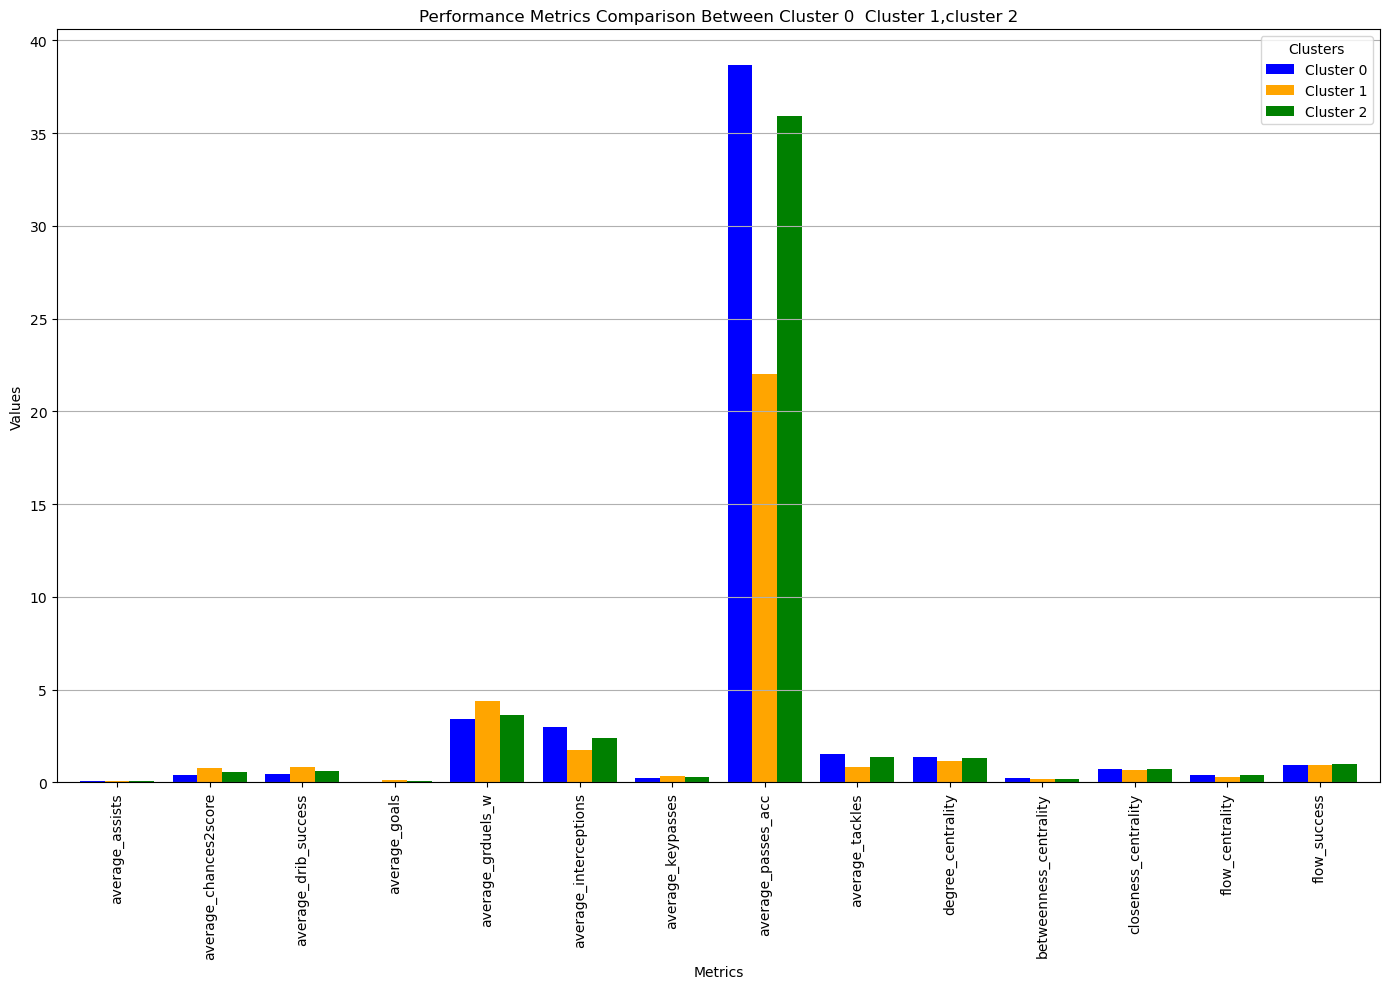

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cluster_performance' is your DataFrame
# Define the performance metrics
metrics = [
    'average_assists',
'average_chances2score',
'average_drib_success',
'average_goals',
'average_grduels_w',
'average_interceptions',
'average_keypasses',
'average_passes_acc',
'average_tackles',
'degree_centrality',
'betweenness_centrality',
'closeness_centrality',
'flow_centrality',
'flow_success'
]

# Filter DataFrame to include only relevant metrics
df = cluster_performance[metrics]

# Transpose the DataFrame for better plotting
df_transposed = df.T
df_transposed.columns = ['Cluster 0', 'Cluster 1','Cluster 2']

# Plotting
plt.figure(figsize=(14, 10))
ax = df_transposed.plot(kind='bar', figsize=(14, 10), width=0.8, color=['blue', 'orange','green'])
plt.title('Performance Metrics Comparison Between Cluster 0  Cluster 1,cluster 2')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(title='Clusters')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Report on Clustering Analysis of Midfielders Based on Average Performance Metrics
Introduction
The purpose of this analysis is to categorize midfielders into distinct clusters based on their average performance metrics. This clustering provides insight into the different roles and playing styles of midfielders, helping coaches, analysts, and scouts to better understand and evaluate players. The analysis was conducted using several key metrics, including defensive actions, passing accuracy, dribbling success, and involvement in goal-scoring opportunities.

Cluster Descriptions
Cluster 0: Balanced Midfielders
Midfielders in Cluster 0 exhibit a balanced set of skills, contributing effectively to both defensive and offensive phases of play. These players have moderate success in aerial duels, dribbling, and tackling, indicating versatility on the field. Their passing accuracy is strong, particularly in long balls, which suggests they play a significant role in ball distribution. They make a considerable number of clearances and interceptions, reflecting their defensive contributions, while also being involved in counterattacks and creating scoring opportunities. These players likely operate as box-to-box midfielders, providing a reliable presence across all areas of the pitch.

Key Characteristics:

Moderate aerial duels won and lost.
Balanced contribution in defense (clearances, interceptions, tackles) and attack (key passes, chances to score).
High passing accuracy, especially in long balls.
Fair dribbling success, with some susceptibility to being dribbled past.
Moderate involvement in fouling and disciplined play.
Cluster 1: Creative Playmakers
Cluster 1 consists of midfielders who excel in creating goal-scoring opportunities. These players are less involved in defensive actions but are pivotal in advancing the ball and setting up goals. They have a higher number of assists and key passes, highlighting their role as primary playmakers. Their dribbling success is relatively high, indicating a tendency to take on defenders, although this is balanced with a higher number of unsuccessful dribbles. They are less effective in aerial duels, which may be less crucial given their advanced positioning on the field. These players are likely to be advanced midfielders or attacking midfielders, focusing on creativity and chance creation.

Key Characteristics:

High number of assists and key passes.
Strong dribbling ability, though with higher unsuccessful attempts.
Lower involvement in defensive actions such as clearances and interceptions.
Higher involvement in attacking play, including more shots taken.
Less effectiveness in aerial duels.
Cluster 2: Defensive Midfielders
Midfielders in Cluster 2 are primarily focused on defensive duties. They excel in winning aerial duels and making clearances and interceptions, which are critical for disrupting opposition attacks. These players are less involved in creating goal-scoring opportunities but play a crucial role in ball recovery and distribution from deeper positions on the pitch. Their passing metrics, particularly long balls, indicate their role in transitioning play from defense to attack. They have higher fouling rates and card accumulation, which is consistent with the aggressive nature of their defensive role. These players are likely to be defensive midfielders who provide a shield in front of the defense and facilitate the team's buildup play.

Key Characteristics:

High success in aerial duels.
Strong defensive contributions (clearances, interceptions, tackles).
Lower involvement in attacking metrics (assists, key passes, goals).
High passing accuracy in long balls, indicating a role in distribution.
Higher fouls and card accumulation, reflecting their defensive focus.
Conclusion
This clustering analysis has identified three distinct groups of midfielders, each with unique strengths and playing styles. Cluster 0 midfielders are versatile and balanced, Cluster 1 midfielders are creative playmakers, and Cluster 2 midfielders are defensively oriented. Understanding these clusters allows for more targeted player assessments and can inform tactical decisions based on the specific needs of a team.

Determining which cluster represents the "best performers" depends on the criteria and context in which performance is evaluated. Each cluster has its own strengths tailored to different roles on the field. However, we can approach this question by considering the following:

Balanced Performance Across Roles (Cluster 0)
Strengths: Cluster 0 midfielders have a well-rounded set of skills, contributing to both defense and offense. They have strong passing accuracy, are involved in clearances, interceptions, and tackles, and also contribute to the team's attacking play through key passes and counterattacks. Their versatility makes them valuable in a variety of tactical setups, making them ideal for teams that require midfielders to be effective in multiple phases of the game.
Assessment: If we consider versatility and the ability to contribute across the board as indicators of high performance, Cluster 0 could be considered the best-performing group.
Creative Impact (Cluster 1)
Strengths: Cluster 1 midfielders excel in creating scoring opportunities through assists and key passes. They are more offensively oriented, contributing significantly to their team's chance creation and overall attacking play. Their dribbling ability also sets them apart as players who can break through defensive lines.
Assessment: If the primary measure of performance is the ability to influence the game offensively, particularly in creating goals, Cluster 1 could be considered the best performers, especially for teams looking for advanced playmakers.
Defensive Stability (Cluster 2)
Strengths: Cluster 2 midfielders are the backbone of their teams' defensive structures. They excel in winning aerial duels, making clearances, interceptions, and tackles, and play a crucial role in ball recovery and distribution. These players are essential for maintaining defensive solidity and can be seen as the best performers in a defensive context.
Assessment: For teams that prioritize defensive stability and ball recovery, Cluster 2 midfielders could be considered the best performers.
Conclusion
There isn't a single cluster that can be definitively labeled as the "best performers" without considering the specific needs and tactical setup of a team. However, Cluster 0 might be seen as the most well-rounded and thus potentially the best overall performers due to their ability to contribute meaningfully to both defensive and offensive aspects of the game. On the other hand, Cluster 1 could be seen as the best in terms of creative and attacking contributions, while Cluster 2 would be top performers in defensive roles. The "best" ultimately depends on what aspect of midfield play is most valued in a given context.

In [261]:
#using the test on the clusters from the train_val
player_test_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
9072,Premier League 2017-18,2017-12-09,"West Ham - Chelsea, 1 - 0",Chelsea,MF,MC,N'Golo Kante,WhoScored,0,0,0,1,0,0,1,1,1,1,103,82,4,0,0,4,0,7,9,1,2,8,1,1,0,0,2,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.733333,0.220179,0.871111,0.612245,1.750425,0.000000,0,1,0,90,90
4473,Bundesliga 2017-18,2017-09-30,"Wolfsburg - Mainz 05, 1 - 1",Mainz 05,MF,MC,Fabian Frei,WhoScored,0,0,0,0,1,1,0,0,1,1,33,21,5,0,0,0,1,1,5,1,2,9,1,0,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.133333,0.131751,0.653333,0.207317,1.479905,0.000000,0,0,0,59,90
18777,Premier League 2017-18,2018-05-05,"Stoke - Crystal Palace, 1 - 2",Crystal Palace,MF,MR,James McArthur,WhoScored,0,1,0,1,0,0,0,1,0,0,48,34,5,0,0,3,3,5,4,0,2,7,1,0,0,0,0,3,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1.333333,0.305264,0.687719,0.337662,1.071410,0.055556,1,0,0,90,90
530,Euro 2016,2016-06-17,"Czech Republic - Croatia, 2 - 2",Czech Republic,MF,DMC,Jaroslav Plasil,WhoScored,0,0,0,0,0,0,0,0,0,0,48,29,2,0,1,0,0,4,8,4,2,8,2,2,4,0,2,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.071429,0.148294,0.574830,0.446154,0.000000,0.000000,0,0,0,86,90
694,Euro 2016,2016-06-20,"Slovakia - England, 0 - 0",England,MF,MC,Jordan Henderson,WhoScored,0,0,0,0,2,2,2,0,0,3,99,76,6,2,7,8,3,3,5,0,1,17,1,0,0,0,5,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.928571,0.294582,0.928571,0.586957,2.769412,0.000000,0,0,0,90,90


In [262]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_test_clustering= player_test_clustering.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test_clustering.head())

            date pos_role            player  goals  assists  shots_ontarget  \
9072  2017-12-09       MC      N'Golo Kante      0        0               1   
4473  2017-09-30       MC       Fabian Frei      0        0               0   
18777 2018-05-05       MR    James McArthur      1        0               1   
530   2016-06-17      DMC   Jaroslav Plasil      0        0               0   
694   2016-06-20       MC  Jordan Henderson      0        0               0   

       shots_offtarget  shotsblocked  chances2score  drib_success  \
9072                 0             0              1             1   
4473                 1             1              0             0   
18777                0             0              0             1   
530                  0             0              0             0   
694                  2             2              2             0   

       drib_unsuccess  keypasses  touches  passes_acc  passes_inacc  \
9072                1          1      1

In [263]:
player_test_clustering.shape

(1442, 49)

In [264]:
# Select columns relevant to player performance metrics, excluding 'date' and 'player'
metric_columns = player_test_clustering.columns.difference(['date', 'player','pos_role'])

# Identify network metrics columns
network_metrics_columns = [
    'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals','flow_success']

# Identify performance metric columns (excluding network metrics)
performance_metric_columns = metric_columns.difference(network_metrics_columns)

# Display the selected columns
print("Performance metric columns:")
print(performance_metric_columns)
print("Network metric columns:")
print(network_metrics_columns)

Performance metric columns:
Index(['aerials_l', 'aerials_w', 'assists', 'chances2score', 'clearances',
       'countattack', 'crosses_acc', 'crosses_inacc', 'dangmistakes',
       'drib_success', 'drib_unsuccess', 'dribbled_past', 'fouls',
       'game_duration', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'keypasses', 'lballs_acc', 'lballs_inacc', 'minutesPlayed',
       'missed_penalties', 'offsides', 'owngoals', 'passes_acc',
       'passes_inacc', 'poss_lost', 'rcards', 'saves_otb', 'shots_offtarget',
       'shots_ontarget', 'shotsblocked', 'stop_shots', 'tackles', 'tballs_acc',
       'tballs_inacc', 'touches', 'wasfouled', 'ycards'],
      dtype='object')
Network metric columns:
['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals', 'flow_success']


In [265]:
import pandas as pd

# Assuming player_train_val_clustering is the DataFrame with your data

# Aggregate performance metrics for each player by summing up the values
aggregated_df = player_test_clustering.groupby('player')[performance_metric_columns].sum().reset_index()

# Aggregate network metrics for each player by averaging the values
network_aggregated_df = player_test_clustering.groupby('player')[network_metrics_columns].mean().reset_index()

# Get the first 'pos' role for each player
pos_role_df = player_test_clustering.groupby('player')['pos_role'].first().reset_index()

# Merge aggregated performance metrics, network metrics, and pos role
aggregated_df = pd.merge(aggregated_df, network_aggregated_df, on='player')
aggregated_df = pd.merge(aggregated_df, pos_role_df, on='player')

# Calculate the number of matches played by each player
aggregated_df['matches_played'] = player_test_clustering.groupby('player')['date'].count().values

print("Aggregated performance, network metrics, and pos role for each player:")
print(aggregated_df.head())

Aggregated performance, network metrics, and pos role for each player:
            player  aerials_l  aerials_w  assists  chances2score  clearances  \
0  Aaron Cresswell          6          2        1              1           3   
1     Aaron Hughes          0          3        0              0           4   
2       Aaron Hunt          9          2        1              5           1   
3     Aaron Lennon          1          0        0              0           0   
4       Aaron Mooy          4         11        1              1          18   

   countattack  crosses_acc  crosses_inacc  dangmistakes  drib_success  \
0            0            3              8             0             0   
1            0            1              2             0             0   
2           10           13             10             0             2   
3            0            0              3             0             0   
4           11            8             10             0             1   

   

In [266]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
aggregated_df.head(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_otb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played
0,Aaron Cresswell,6,2,1,1,3,0,3,8,0,0,2,0,2,180,0,7,0,2,1,6,9,136,0,0,0,34,14,32,0,0,0,0,0,2,0,0,1,88,0,0,1.156593,0.170551,0.686900,0.268540,0.081250,0.595261,DML,2
1,Aaron Hughes,0,3,0,0,4,0,1,2,0,0,0,0,0,90,0,0,2,2,0,1,1,90,0,0,0,13,2,8,0,0,0,0,0,0,2,0,0,32,0,0,0.846154,0.168241,0.547511,0.216667,0.000000,0.610697,DMR,1
2,Aaron Hunt,9,2,1,5,1,10,13,10,0,2,2,1,2,450,1,14,19,5,9,25,13,409,0,0,0,220,38,66,0,0,5,1,2,0,3,1,5,340,5,0,1.526667,0.226394,0.795570,0.429175,0.011452,1.292905,AMC,5
3,Aaron Lennon,1,0,0,0,0,0,0,3,0,0,0,1,0,90,0,4,5,2,0,1,1,78,0,0,0,20,2,10,0,0,1,0,1,0,0,0,0,34,2,0,0.857143,0.059120,0.603571,0.240506,0.000000,0.883914,MR,1
4,Aaron Mooy,4,11,1,1,18,11,8,10,0,1,2,2,4,630,1,25,27,25,7,27,21,630,0,0,0,336,58,97,0,0,2,2,2,2,7,2,3,507,3,1,1.429461,0.293822,0.774960,0.492919,0.013438,0.609741,DMC,7
5,Aaron Ramsey,3,2,0,6,0,7,5,2,0,3,3,3,7,360,1,27,16,9,2,14,11,316,0,2,0,134,27,48,0,0,4,4,2,0,6,2,6,217,5,1,1.552198,0.211910,0.825042,0.363655,0.009615,1.102728,MC,4
6,Abdallah El Said,2,1,0,1,1,0,0,1,0,0,1,1,0,90,0,0,2,3,2,4,1,90,0,0,0,58,7,13,0,0,1,0,0,0,1,1,2,77,1,0,1.785714,0.397138,0.862245,0.578947,0.000000,0.728965,AMC,1
7,Abdoulaye Doucoure,9,11,0,1,9,4,2,4,2,8,2,4,3,630,3,26,31,27,3,20,14,630,0,1,0,380,78,102,0,0,7,3,3,0,9,1,6,563,7,1,1.590738,0.290271,0.783467,0.509890,0.005102,0.820174,DMC,7
8,Abdullah Otayf,0,0,0,0,1,1,0,0,0,0,1,1,1,90,0,4,4,6,0,5,2,90,0,0,0,82,9,11,0,0,0,0,0,0,3,1,0,98,1,0,1.500000,0.212739,0.804762,0.554217,0.000000,0.635365,DMC,1
9,Adam Lallana,2,0,0,0,0,0,1,3,0,1,0,0,1,90,0,5,1,0,1,4,2,86,0,0,0,34,7,18,0,0,5,0,4,0,0,1,0,57,0,0,1.571429,0.212733,0.791209,0.400000,0.000000,1.832826,AMC,1


In [267]:
# Assuming 'pos_encoded' is the column name for the encoded pos role
# Exclude 'pos_encoded' from the averaging process but still include it in clustering
performance_metric_columns_for_averaging = [col for col in performance_metric_columns if col != 'pos_role']

# Calculate the average performance metrics for each player, excluding 'pos_encoded'
for column in performance_metric_columns_for_averaging:
    aggregated_df[f'average_{column}'] = aggregated_df[column] / aggregated_df['matches_played']

# Select only the average metrics for clustering, plus 'pos_encoded'
average_performance_columns = [f'average_{column}' for column in performance_metric_columns_for_averaging]

# Combine average performance metrics, network metrics, and 'pos_encoded' for clustering
clustering_features = average_performance_columns + network_metrics_columns + ['pos_role']

print("Aggregated DataFrame with average performance metrics, network metrics, and pos role:")
print(aggregated_df[['player'] + clustering_features])

Aggregated DataFrame with average performance metrics, network metrics, and pos role:
                       player  average_aerials_l  average_aerials_w  \
0             Aaron Cresswell           3.000000           1.000000   
1                Aaron Hughes           0.000000           3.000000   
2                  Aaron Hunt           1.800000           0.400000   
3                Aaron Lennon           1.000000           0.000000   
4                  Aaron Mooy           0.571429           1.571429   
5                Aaron Ramsey           0.750000           0.500000   
6            Abdallah El Said           2.000000           1.000000   
7          Abdoulaye Doucoure           1.285714           1.571429   
8              Abdullah Otayf           0.000000           0.000000   
9                Adam Lallana           2.000000           0.000000   
10                  Adam Nagy           1.000000           0.000000   
11                Adam Pinter           3.000000           0.0

In [268]:
# Select features for clustering
features = aggregated_df[clustering_features]

In [269]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_otb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role
0,3.000000,1.000000,0.500000,0.500000,1.500000,0.000000,1.500000,4.000000,0.0,0.000000,1.000000,0.000000,1.000000,90.0,0.000000,3.500000,0.000000,1.000000,0.5,3.000000,4.5,68.0,0.0,0.0,0.0,17.0,7.000000,16.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.500000,44.000000,0.000000,0.000000,1.156593,0.170551,0.686900,0.268540,0.081250,0.595261,DML
1,0.000000,3.000000,0.000000,0.000000,4.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,90.0,0.000000,0.000000,2.000000,2.000000,0.0,1.000000,1.0,90.0,0.0,0.0,0.0,13.0,2.000000,8.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,32.000000,0.000000,0.000000,0.846154,0.168241,0.547511,0.216667,0.000000,0.610697,DMR
2,1.800000,0.400000,0.200000,1.000000,0.200000,2.000000,2.600000,2.000000,0.0,0.400000,0.400000,0.200000,0.400000,90.0,0.200000,2.800000,3.800000,1.000000,1.8,5.000000,2.6,81.8,0.0,0.0,0.0,44.0,7.600000,13.200000,0.0,0.0,1.000000,0.200000,0.400000,0.000000,0.6,0.200000,1.000000,68.000000,1.000000,0.000000,1.526667,0.226394,0.795570,0.429175,0.011452,1.292905,AMC
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,0.000000,0.000000,1.000000,0.000000,90.0,0.000000,4.000000,5.000000,2.000000,0.0,1.000000,1.0,78.0,0.0,0.0,0.0,20.0,2.000000,10.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,34.000000,2.000000,0.000000,0.857143,0.059120,0.603571,0.240506,0.000000,0.883914,MR
4,0.571429,1.571429,0.142857,0.142857,2.571429,1.571429,1.142857,1.428571,0.0,0.142857,0.285714,0.285714,0.571429,90.0,0.142857,3.571429,3.857143,3.571429,1.0,3.857143,3.0,90.0,0.0,0.0,0.0,48.0,8.285714,13.857143,0.0,0.0,0.285714,0.285714,0.285714,0.285714,1.0,0.285714,0.428571,72.428571,0.428571,0.142857,1.429461,0.293822,0.774960,0.492919,0.013438,0.609741,DMC


In [270]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-hot encode 'pos_role'
one_hot_encoder = OneHotEncoder(sparse_output=False)
pos_role_encoded = one_hot_encoder.fit_transform(features[['pos_role']])

# Create a DataFrame with the encoded 'pos_role'
pos_role_encoded_df = pd.DataFrame(pos_role_encoded, columns=one_hot_encoder.get_feature_names_out(['pos_role']))

# Drop the original 'pos_role' column from the features DataFrame
features_without_pos_role = features.drop(columns=['pos_role'])

# Apply Min-Max scaling to the remaining features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_without_pos_role)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_without_pos_role.columns)

# Combine the scaled features with the one-hot encoded 'pos_role'
features_scaled = pd.concat([scaled_features_df, pos_role_encoded_df], axis=1)

# Show the final DataFrame with scaled features and one-hot encoded 'pos_role'
print("Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':")
print(features_scaled.head())

Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':
   average_aerials_l  average_aerials_w  average_assists  \
0           0.300000           0.125000         0.500000   
1           0.000000           0.375000         0.000000   
2           0.180000           0.050000         0.200000   
3           0.100000           0.000000         0.000000   
4           0.057143           0.196429         0.142857   

   average_chances2score  average_clearances  average_countattack  \
0               0.100000            0.250000             0.000000   
1               0.000000            0.666667             0.000000   
2               0.200000            0.033333             0.235294   
3               0.000000            0.000000             0.000000   
4               0.028571            0.428571             0.184874   

   average_crosses_acc  average_crosses_inacc  average_dangmistakes  \
0             0.250000               0.571429                   0.0   
1    

In [271]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components as needed
X_pca = pca.fit_transform(features_scaled)

print("\nPCA-transformed DataFrame:")
print(X_pca)


PCA-transformed DataFrame:
[[-0.31565823 -0.03443848]
 [-0.32131289  0.01274761]
 [-0.46488379 -0.32697625]
 ...
 [-0.50931596 -0.3698991 ]
 [ 0.61277865 -0.27544381]
 [-0.13585644  0.98285498]]


In [272]:
kmeans

KMeans(n_clusters=3)

In [273]:
import numpy as np

# Fit the KMeans model (if not already fitted) and get the cluster centers
cluster_labels = kmeans.predict(X_pca)
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
aggregated_df['cluster'] = cluster_labels

# Calculate the distance of each player to the cluster centroid
distances = []
for i, row in aggregated_df.iterrows():
    cluster = row['cluster']
    centroid = centroids[cluster]
    player_features = X_pca[i]
    distance = np.linalg.norm(player_features - centroid)
    distances.append(distance)

aggregated_df['distance_to_centroid'] = distances

# Sort players within each cluster based on their distance to the centroid
aggregated_df['rank_within_cluster'] = aggregated_df.groupby('cluster')['distance_to_centroid'].rank()

# Sort the players based on cluster rank and distance to centroid
sorted_players = aggregated_df.sort_values(by=['rank_within_cluster', 'player'])

# Display the sorted players
print("Sorted players by cluster performance and distance to centroid:")
print(sorted_players[['player', 'cluster', 'distance_to_centroid', 'rank_within_cluster']])

Sorted players by cluster performance and distance to centroid:
                       player  cluster  distance_to_centroid  \
30                Amine Harit        0              0.033902   
301           Marc Albrighton        1              0.008088   
347              Migjen Basha        2              0.163677   
5                Aaron Ramsey        0              0.039746   
55               Arturo Vidal        2              0.176466   
471            Tim Handwerker        1              0.014104   
197             Jack Wilshere        2              0.188128   
297            Mahmoud Dahoud        0              0.044370   
340    Maximilian Mittelstadt        1              0.021776   
265      Kevin-Prince Boateng        2              0.198558   
425               Ryan Fraser        1              0.034948   
458               Suat Serdar        0              0.046242   
171    Giorgian de Arrascaeta        1              0.035126   
201            Jake Livermore        0  

In [274]:
cluster_1_players = sorted_players[sorted_players['cluster'] == 1]
cluster_0_players = sorted_players[sorted_players['cluster'] == 0]
cluster_2_players = sorted_players[sorted_players['cluster'] == 2]

In [275]:
cluster_1_players.head(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_otb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_otb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster,distance_to_centroid,rank_within_cluster
301,Marc Albrighton,0,2,2,1,3,1,6,15,0,4,2,1,1,270,0,13,17,6,4,15,17,270,0,0,0,49,26,52,0,0,2,0,1,0,5,3,5,138,2,0,1.133333,0.180476,0.700455,0.296481,0.031159,1.033997,ML,3,0.000000,0.666667,0.666667,0.333333,1.000000,0.333333,2.000000,5.000000,0.0,1.333333,0.666667,0.333333,0.333333,90.0,0.000000,4.333333,5.666667,2.000000,1.333333,5.000000,5.666667,90.000000,0.0,0.000000,0.0,16.333333,8.666667,17.333333,0.0,0.0,0.666667,0.000000,0.333333,0.000000,1.666667,1.0,1.666667,46.000000,0.666667,0.000000,1,0.008088,1.0
471,Tim Handwerker,0,2,0,0,4,1,1,5,1,4,2,1,1,180,0,6,10,2,0,2,3,145,0,0,0,31,11,21,0,0,1,0,0,0,1,0,1,74,2,0,0.900000,0.120500,0.583860,0.281048,0.000000,0.794142,ML,2,0.000000,1.000000,0.000000,0.000000,2.000000,0.500000,0.500000,2.500000,0.5,2.000000,1.000000,0.500000,0.500000,90.0,0.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.500000,72.500000,0.0,0.000000,0.0,15.500000,5.500000,10.500000,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.0,0.500000,37.000000,1.000000,0.000000,1,0.014104,2.0
340,Maximilian Mittelstadt,2,1,0,1,1,0,0,4,0,1,1,2,0,90,0,8,4,4,0,2,0,90,0,0,0,19,3,9,0,0,0,1,0,0,1,0,0,39,1,0,1.066667,0.160442,0.653333,0.315068,0.000000,0.311984,ML,1,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.0,1.000000,1.000000,2.000000,0.000000,90.0,0.000000,8.000000,4.000000,4.000000,0.000000,2.000000,0.000000,90.000000,0.0,0.000000,0.0,19.000000,3.000000,9.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,39.000000,1.000000,0.000000,1,0.021776,3.0
425,Ryan Fraser,1,1,1,3,2,5,9,7,0,1,0,0,0,180,0,3,6,4,1,2,8,180,0,0,0,67,19,30,0,0,1,2,0,0,1,0,0,123,5,0,1.300000,0.250889,0.689630,0.378571,0.038981,1.165670,DMR,2,0.500000,0.500000,0.500000,1.500000,1.000000,2.500000,4.500000,3.500000,0.0,0.500000,0.000000,0.000000,0.000000,90.0,0.000000,1.500000,3.000000,2.000000,0.500000,1.000000,4.000000,90.000000,0.0,0.000000,0.0,33.500000,9.500000,15.000000,0.0,0.0,0.500000,1.000000,0.000000,0.000000,0.500000,0.0,0.000000,61.500000,2.500000,0.000000,1,0.034948,4.0
171,Giorgian de Arrascaeta,0,1,0,0,1,0,1,1,0,2,0,1,1,90,0,5,3,2,0,2,0,59,0,0,0,24,1,6,0,0,0,0,0,0,0,0,0,35,1,0,1.071429,0.094491,0.603571,0.294118,0.000000,1.048268,ML,1,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,2.000000,0.000000,1.000000,1.000000,90.0,0.000000,5.000000,3.000000,2.000000,0.000000,2.000000,0.000000,59.000000,0.0,0.000000,0.0,24.000000,1.000000,6.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,35.000000,1.000000,0.000000,1,0.035126,5.0
413,Ricardo Quares

In [276]:
cluster_0_players.tail(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_otb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_otb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster,distance_to_centroid,rank_within_cluster
380,Omid Ebrahimi,2,0,0,0,5,2,2,0,0,1,0,1,4,90,0,9,3,3,1,1,1,90,0,0,0,16,4,8,0,0,0,0,0,1,1,0,1,34,0,1,1.230769,0.260512,0.615385,0.319149,0.000000,0.428958,MC,1,2.000000,0.000000,0.000000,0.000000,5.0,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000,90.0,0.0,9.000000,3.000000,3.000000,1.000000,1.000000,1.000000,90.000000,0.0,0.0,0.0,16.000000,4.000000,8.000000,0.0,0.0,0.000000,0.000000,0.000000,1.00,1.000000,0.000000,1.000000,34.000000,0.000000,1.000000,0,0.308528,146.0
154,Ferjani Sassi,2,0,0,0,2,0,0,0,1,1,0,0,2,90,0,3,1,0,1,7,6,46,0,0,0,50,7,10,0,0,1,0,1,0,0,4,5,64,2,1,1.428571,0.169276,0.754464,0.441860,0.000000,1.203175,MC,1,2.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,90.0,0.0,3.000000,1.000000,0.000000,1.000000,7.000000,6.000000,46.000000,0.0,0.0,0.0,50.000000,7.000000,10.000000,0.0,0.0,1.000000,0.000000,1.000000,0.00,0.000000,4.000000,5.000000,64.000000,2.000000,1.000000,0,0.326495,147.0
350,Mike Frantz,7,10,1,5,2,3,1,3,0,3,1,1,5,360,0,14,5,9,0,3,2,254,0,0,0,38,9,22,0,0,3,2,2,1,3,0,1,88,1,0,0.876190,0.105049,0.584567,0.163035,0.022727,1.589744,MC,4,1.750000,2.500000,0.250000,1.250000,0.5,0.750000,0.250000,0.750000,0.000000,0.750000,0.250000,0.250000,1.250000,90.0,0.0,3.500000,1.250000,2.250000,0.000000,0.750000,0.500000,63.500000,0.0,0.0,0.0,9.500000,2.250000,5.500000,0.0,0.0,0.750000,0.500000,0.500000,0.25,0.750000,0.000000,0.250000,22.000000,0.250000,0.000000,0,0.327735,148.0
498,William Carvalho,4,6,0,1,5,2,0,1,0,0,1,0,5,210,0,6,9,7,0,9,6,210,0,0,0,117,10,17,0,0,0,1,0,0,5,1,1,156,3,1,1.535714,0.191982,0.737351,0.527055,0.000000,0.737461,MC,2,2.000000,3.000000,0.000000,0.500000,2.5,1.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,2.500000,105.0,0.0,3.000000,4.500000,3.500000,0.000000,4.500000,3.000000,105.000000,0.0,0.0,0.0,58.500000,5.000000,8.500000,0.0,0.0,0.000000,0.500000,0.000000,0.00,2.500000,0.500000,0.500000,78.000000,1.500000,0.500000,0,0.337053,149.0
129,Diego Demme,9,0,1,1,6,13,4,2,0,3,2,8,14,540,0,32,28,31,1,34,24,513,0,0,0,344,79,102,0,0,1,0,0,0,15,2,7,506,16,0,1.463675,0.255531,0.766903,0.493311,0.003704,0.743030,MC,6,1.500000,0.000000,0.166667,0.166667,1.0,2.166667,0.666667,0.333333,0.000000,0.500000,0.333333,1.333333,2.333333,90.0,0.0,5.333333,4.666667,5.166667,0.166667,5.666667,4.000000,85.500000,0.0,0.0,0.0,57.333333,13.166667,17.000000,0.0,0.0,0.166667,0.000000,0.000000,0.00,2.500000,0.333333,1.166667,84.333333,2.666667,0.000000,0,0.347038,150.0
179,Harry Arter,0,2,0,1,0,1,0,0,1,4,1,0,5,270,0,12,11,9,0,16,7,27